In [1]:
import os
HUTUB_ROOT_DIR = "/mnt/c/users/evanb/The Cooper Union for the Advancement of Science and Art/ME-Project-6-HRTF-Estimation - General/HUTUB"

HRIR_DIR = os.path.join(HUTUB_ROOT_DIR, "HRIRs")

test_file = "pp1_HRIRs_measured.sofa"
test_file_path = os.path.join(HRIR_DIR, test_file)

import matplotlib as mpl
COLOR = 'white'
mpl.rcParams['text.color'] = COLOR
mpl.rcParams['axes.labelcolor'] = COLOR
mpl.rcParams['xtick.color'] = COLOR
mpl.rcParams['ytick.color'] = COLOR

import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

def plot_coordinates(coords, title):
    x0 = coords
    n0 = coords
    fig = plt.figure(figsize=(15, 15))
    ax = fig.add_subplot(111, projection='3d')
    q = ax.quiver(x0[:, 0], x0[:, 1], x0[:, 2], n0[:, 0],
                  n0[:, 1], n0[:, 2], length=0.1)
    plt.xlabel('x (m)')
    plt.ylabel('y (m)')
    plt.title(title)
    #plt.savefig("{}.png".format(title), format='png')
    plt.show()

    return q

def plot_emitter_response(hrir, t, measurement, emitter):
    plt.figure(figsize=(15, 5))
    for receiver in np.arange(hrir.R):
        plt.plot(t, hrir.IR[measurement, receiver, :])
        legend.append('Receiver {0}'.format(receiver))
    plt.title('HRIR at M={0} for emitter {1}'.format(measurement, emitter))
    plt.legend(legend)
    plt.xlabel('$t$ in s')
    plt.ylabel(r'$h(t)$')
    plt.grid()

    plt.show()

from acousticslib.plots import plot_time_series
def plot_emitter_response_2(hrir, t, measurement, emitter):
    plot_time_series(t, hrir.IR[measurement, :, :], title='HRIR at M={0} for emitter {1}'.format(measurement, emitter))

    plt.show()

In [2]:
import os
from utils.CustomSOFA import SOFA
HUTUB_ROOT_DIR = "/mnt/c/users/evanb/The Cooper Union for the Advancement of Science and Art/ME-Project-6-HRTF-Estimation - General/HUTUB"
HRIR_DIR = os.path.join(HUTUB_ROOT_DIR, "HRIRs")
test_file = "pp1_HRIRs_measured.sofa"
test_file_path = os.path.join(HRIR_DIR, test_file)
import IPython
import pysofaconventions
import matplotlib.pyplot as plt
# import soundfile as sf
import numpy as np
from acousticslib.plots import *
from acousticslib.domain_conversions import *

def playback(audiofile_path):
    IPython.display.Audio(audiofile_path)

def read_sofa(sofa_path):
    return SOFA(pysofaconventions.SOFAFile(sofa_path,'r'))

hrir = read_sofa(test_file_path)


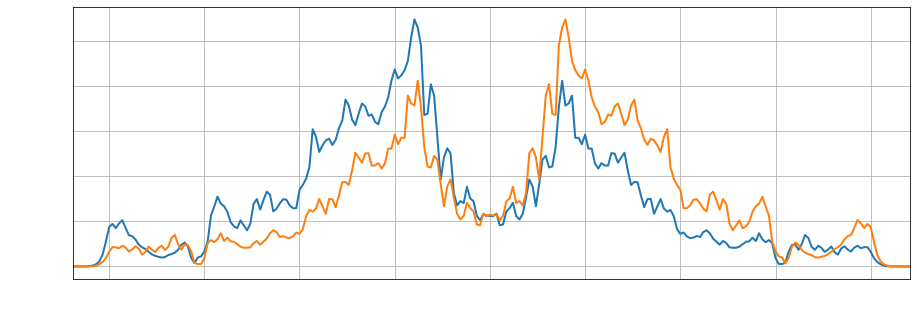

In [3]:
# plot Data.IR at M=5 for E=0
measurement = 5
emitter = 0
legend = []

t = np.arange(0,hrir.N)/hrir.SamplingRate

dt = 1/hrir.SamplingRate
x = hrir.IR[measurement, :, :]

X, f_range = timeseries2linearspectrum(x, dt)
plot_linear_spectrum_amplitude(f_range, X)

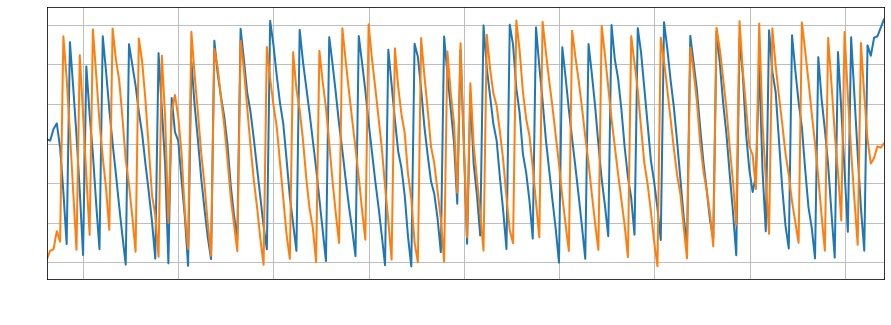

In [4]:
plot_phase(f_range, X)

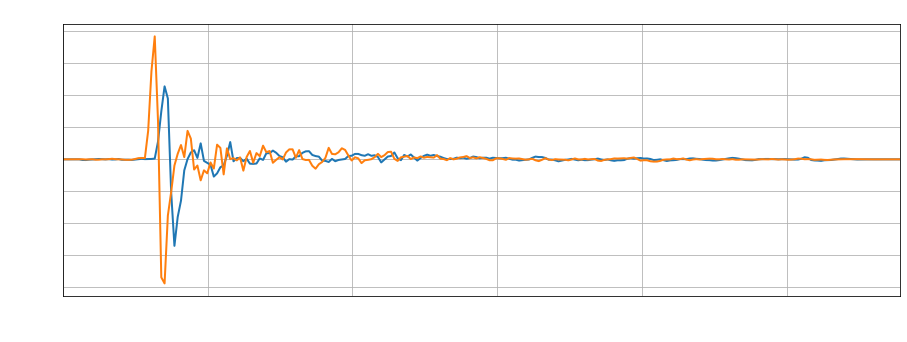

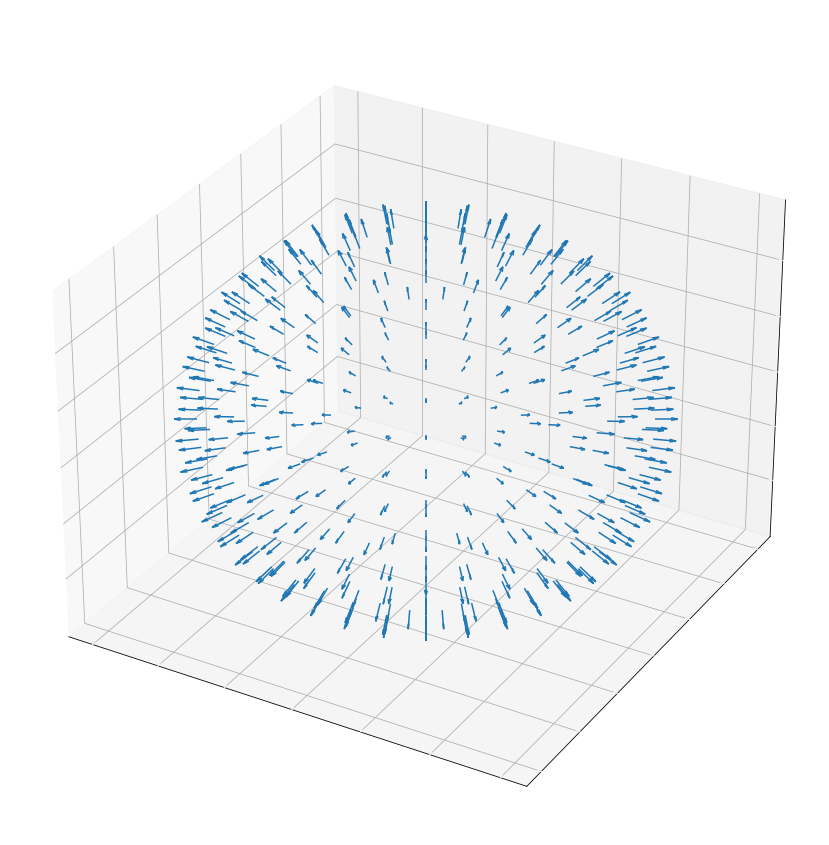

In [5]:


plot_emitter_response_2(hrir, t, measurement, emitter)
plot_coordinates(SOFA.sph2cart(hrir.Source["Position"]), "Source positions")